In [1]:
from brainways_datamodule import BrainwaysDataModule
import matplotlib.pyplot as plt
import torch

In [2]:
datamodule = BrainwaysDataModule(batch_size=None)
ds_iter = iter(datamodule.test_dataloader())

Bg_atlasapi: whs_sd_rat_39um version 1.0 is not the latest available (1.1). To update the atlas run in the 
terminal:
    brainglobe update -a whs_sd_rat_39um

/home/ben/miniconda3/envs/brm-dinov2/lib/python3.11/site-packages/albumentations/augmentations/functional.py:164: RuntimeWarning: invalid value encountered in divide
  normalized_img = (img - img_min) / (img_max - img_min)
/home/ben/miniconda3/envs/brm-dinov2/lib/python3.11/site-packages/albumentations/augmentations/functional.py:1071: RuntimeWarning: invalid value encountered in cast
  return (img * max_value).astype(dtype)


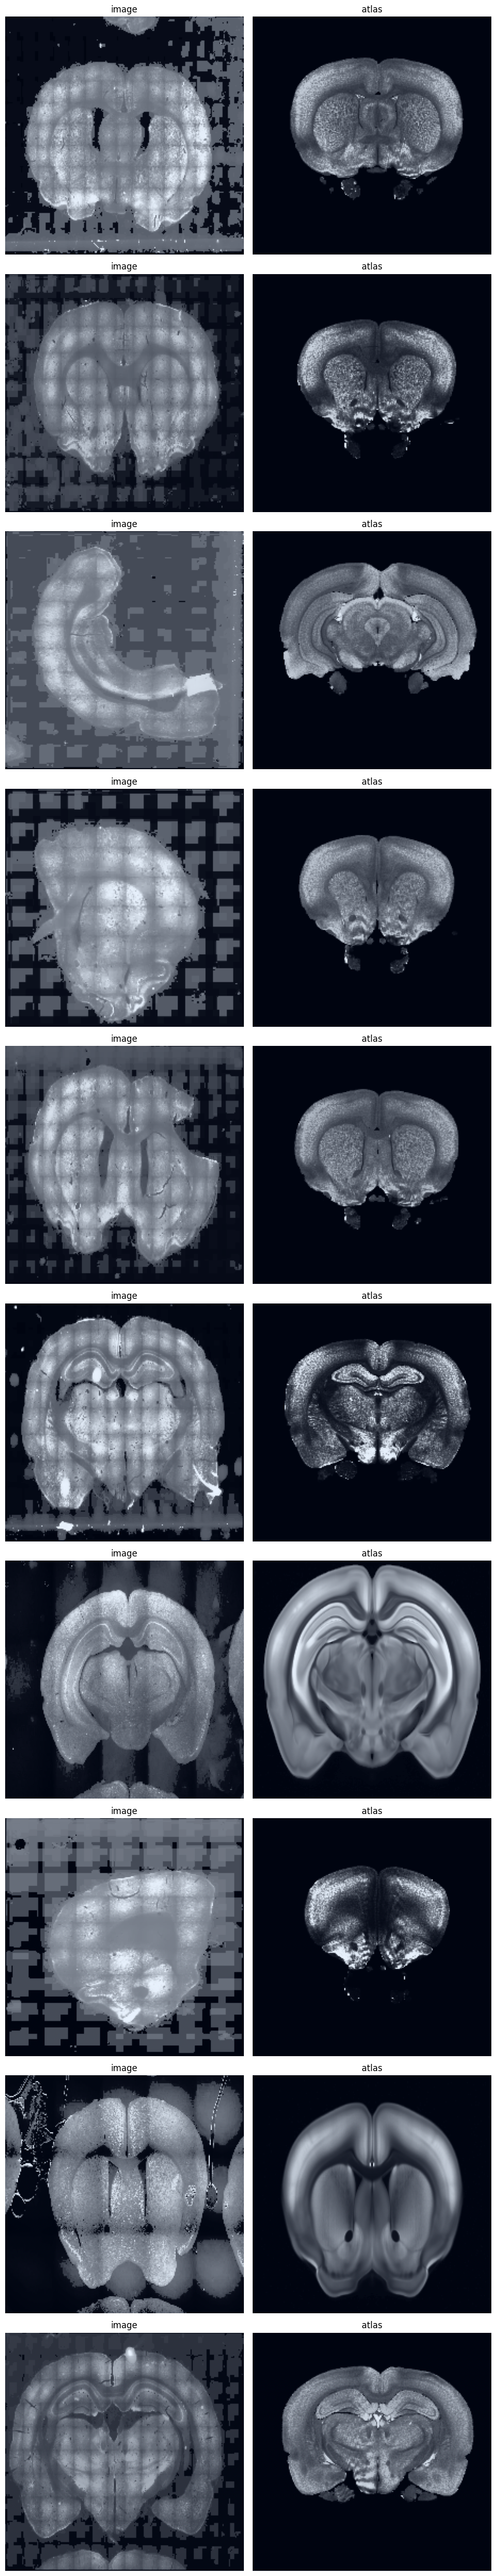

In [3]:
def get_display_image(image: torch.Tensor):
    image = (image - torch.min(image)) / (torch.max(image) - torch.min(image))
    return image.squeeze().permute(1, 2, 0).numpy()


samples = [next(ds_iter) for _ in range(10)]

fig, axs = plt.subplots(10, 2, figsize=(10, 50))

for i, sample in enumerate(samples):
    im = axs[i, 0].imshow(get_display_image(sample["image"]))
    axs[i, 0].set_title("image")
    axs[i, 0].axis("off")

    atlas_image, _, _ = datamodule.val_dataset._create_atlas_sample(
        ap=int(sample["ap"]), atlas_name=sample["atlas_name"]
    )
    axs[i, 1].imshow(get_display_image(atlas_image))
    axs[i, 1].set_title("atlas")
    axs[i, 1].axis("off")

plt.tight_layout()
plt.show()